In [3]:
import pandas as pd
covid_data = pd.read_csv('C:/Users/админ/Desktop/IDE/SKILLFACTORY/PHITON 13/DATA/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data = pd.read_csv('C:/Users/админ/Desktop/IDE/SKILLFACTORY/PHITON 13/DATA/country_vaccinations.csv')
display(vaccinations_data.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


Мы будем работать со следующими столбцами:

date — дата наблюдения;
province/state — наименование провинции/штата;
country — наименование страны;
confirmed — общее число зафиксированных случаев на указанный день;
deaths — общее число зафиксированных смертей на указанный день;
recovered — общее число выздоровлений на указанный день.

In [5]:
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Данная таблица содержит следующие столбцы:

country — наименование страны;
date — дата наблюдения;
total_vaccinations — общее число введённых вакцин в стране на указанный день;
people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
vaccines — комбинации вакцин, используемые в стране.

Признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.

ПРЕДОБРАБОТКА ДАННЫХ

В таблице covid_data:
Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [6]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [7]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [8]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [14]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [15]:
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [16]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

In [17]:
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до  2021-05-29 00:00:00


За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

In [18]:
print(f"Данные о вакцинации предоставлены от {vaccinations_data['date'].min()} до {vaccinations_data['date'].max()}")

Данные о вакцинации предоставлены от 2020-12-02 00:00:00 до 2021-09-06 00:00:00


С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.
Сохраните таблицу covid_df — она понадобится нам в следующем юните.
Сколько строк и столбцов в таблице covid_df?

In [61]:
covid_df = covid_data.merge(
    vaccinations_data, 
    on=['date', 'country'],
    how='left')
covid_df.info


<bound method DataFrame.info of             date                         country  confirmed  deaths  \
0     2020-02-24                     Afghanistan        1.0     0.0   
1     2020-02-25                     Afghanistan        1.0     0.0   
2     2020-02-26                     Afghanistan        1.0     0.0   
3     2020-02-27                     Afghanistan        1.0     0.0   
4     2020-02-28                     Afghanistan        1.0     0.0   
...          ...                             ...        ...     ...   
86780 2020-03-12  occupied Palestinian territory        0.0     0.0   
86781 2020-03-14  occupied Palestinian territory        0.0     0.0   
86782 2020-03-15  occupied Palestinian territory        0.0     0.0   
86783 2020-03-16  occupied Palestinian territory        0.0     0.0   
86784 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  \
0            0.0     1.0              N

In [62]:
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [63]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recovered_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)



7.19

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [64]:
round(covid_df[covid_df['country'] == 'Russia']['recovered_rate'].mean(), 2)

67.06

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

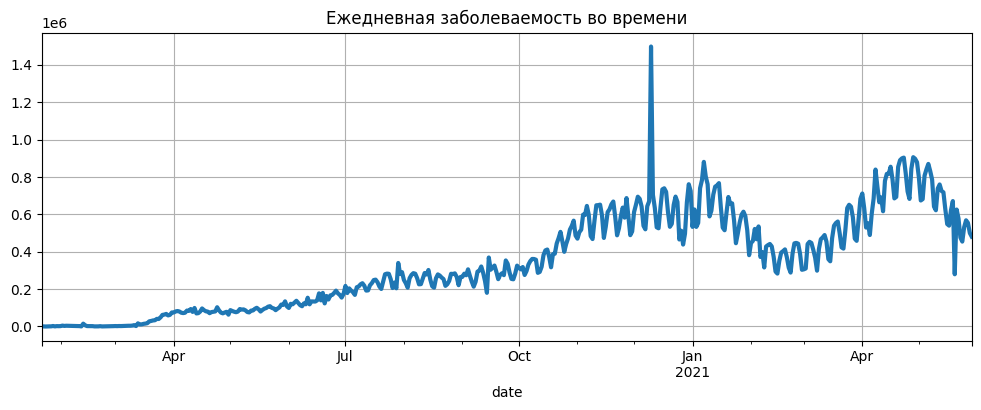

In [68]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

Примечание. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

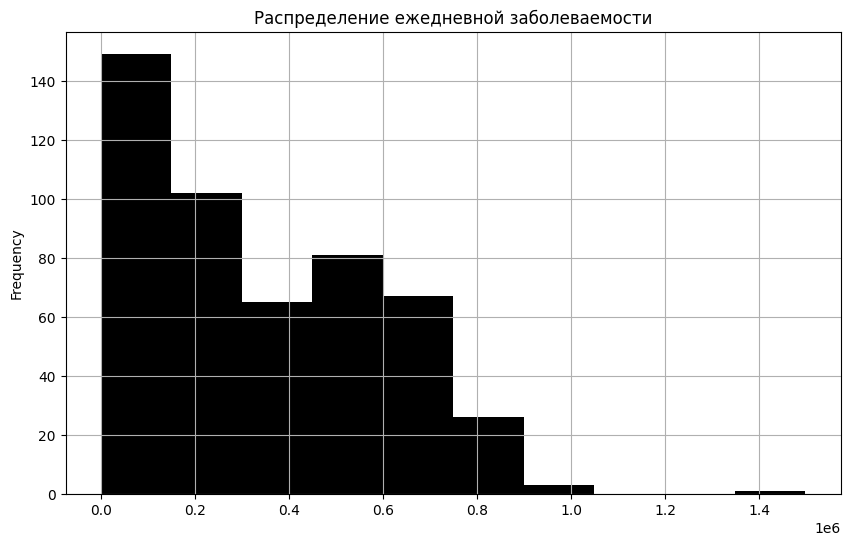

In [24]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

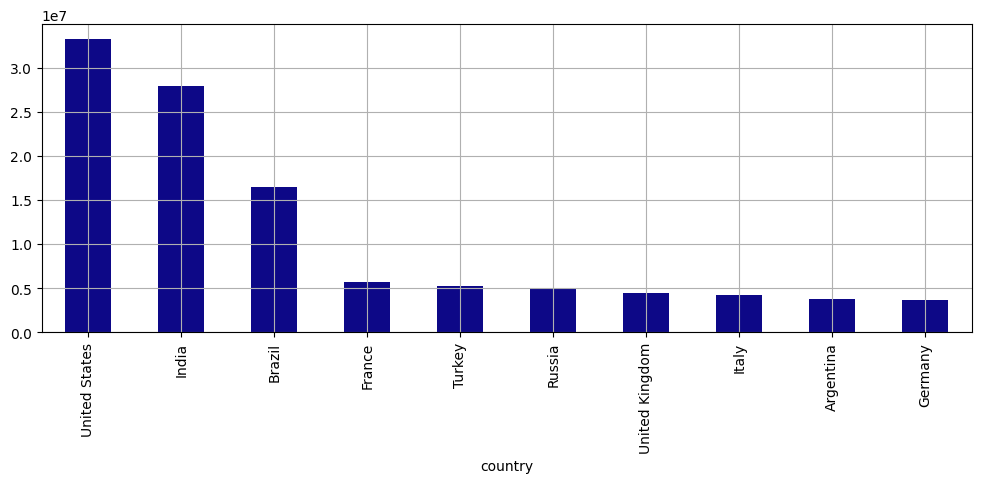

In [25]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

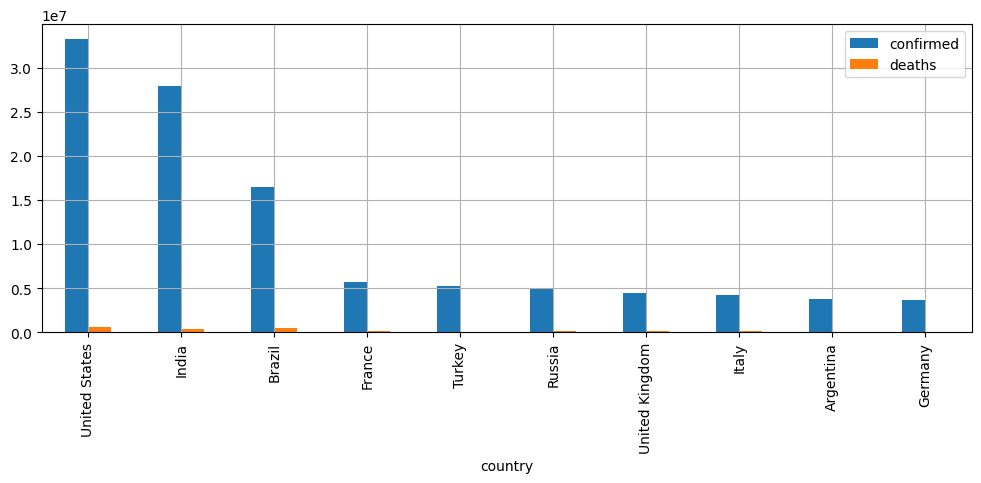

In [26]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

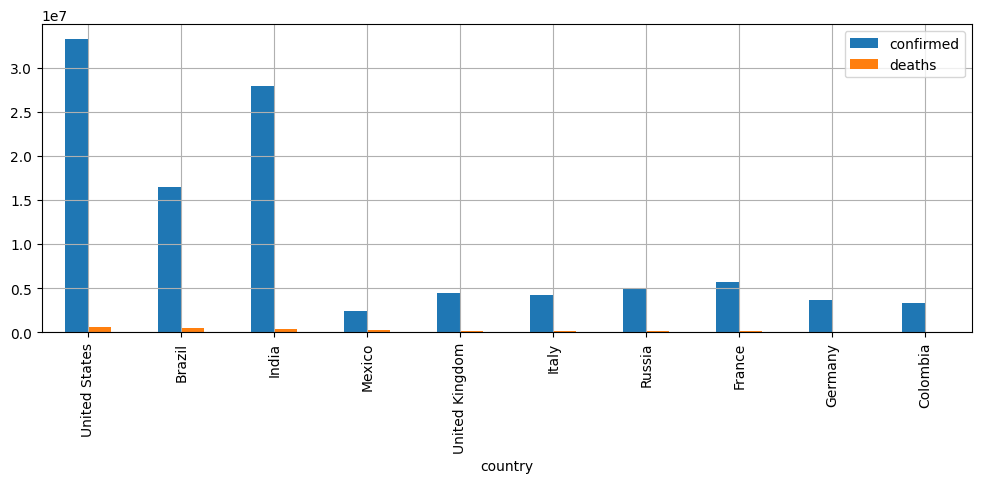

In [27]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Постройте график из задания 4.4. В какой стране число вакцинированных наименьшее?
Россия
Гвинея-Бисау
Южный Судан
Центральноафриканская Республика
Китай

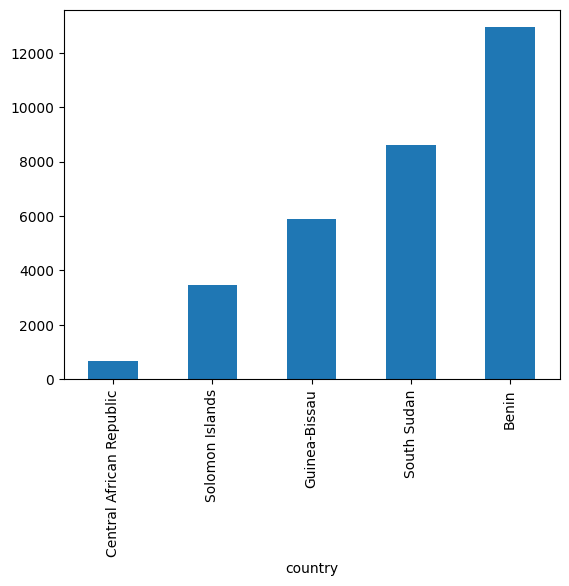

In [28]:

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');


Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

In [30]:
import matplotlib.pyplot as plt

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

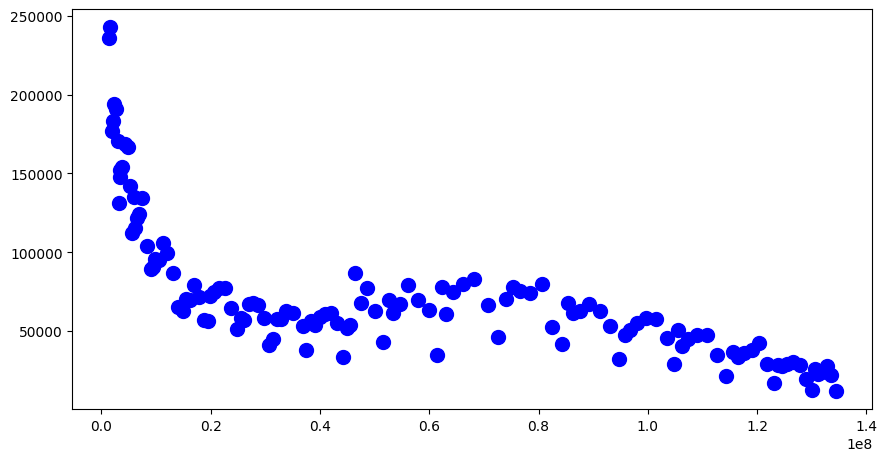

In [31]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

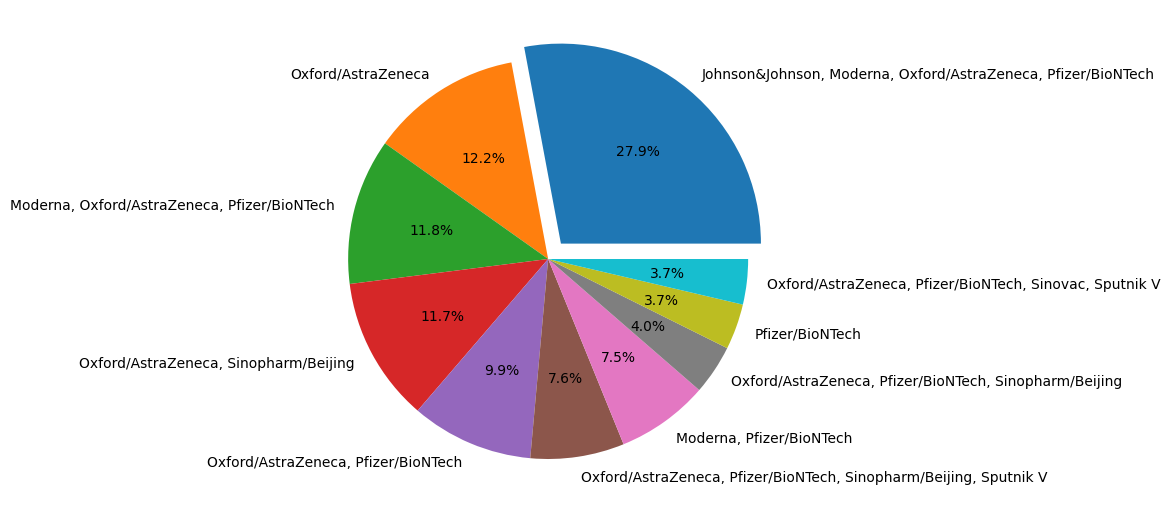

In [32]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.

→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:

Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода dropna(), который удаляет строки, содержащие пропуски в столбце, указанном в параметре subset(). Данный метод мы будем изучать в следующем модуле, посвящённом очистке данных — пока что не вам не стоит заострять на нём внимание:

In [33]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

Полученные данные необходимо сгруппировать по странам (country) и определить последнюю зафиксированную комбинации вакцин в столбце vaccines:

In [35]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

В результате такого преобразования мы получаем Series, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.

In [36]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

Преобразуем данные с помощью метода apply(): применим к столбцу lambda-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.

In [37]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:

In [38]:
display(combination_last)

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

Создадим словарь vaccines_dict={}, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.
Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам Series combination_last. На каждой итерации цикла в переменной цикла vaccines_list будет находиться список вакцин, которые используются в стране.

Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.

В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря vaccones_dict. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

In [39]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

В результате работы получаем словарь, который преобразуем в объект Series. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как 'other'. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в Series по индексу 'other'.

Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.

In [40]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

Строим круговую диаграмму:

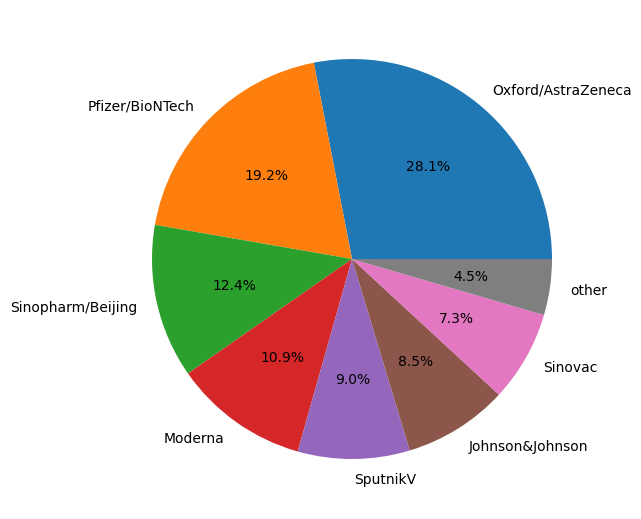

In [41]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

Полный код:

#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

Изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

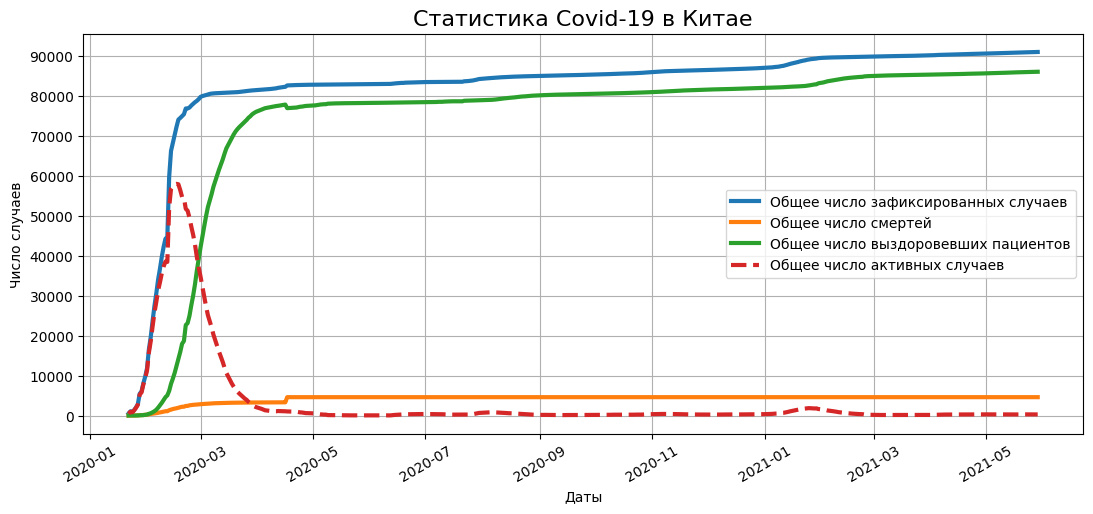

In [42]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее число активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание на выделенные чёрным маркером сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

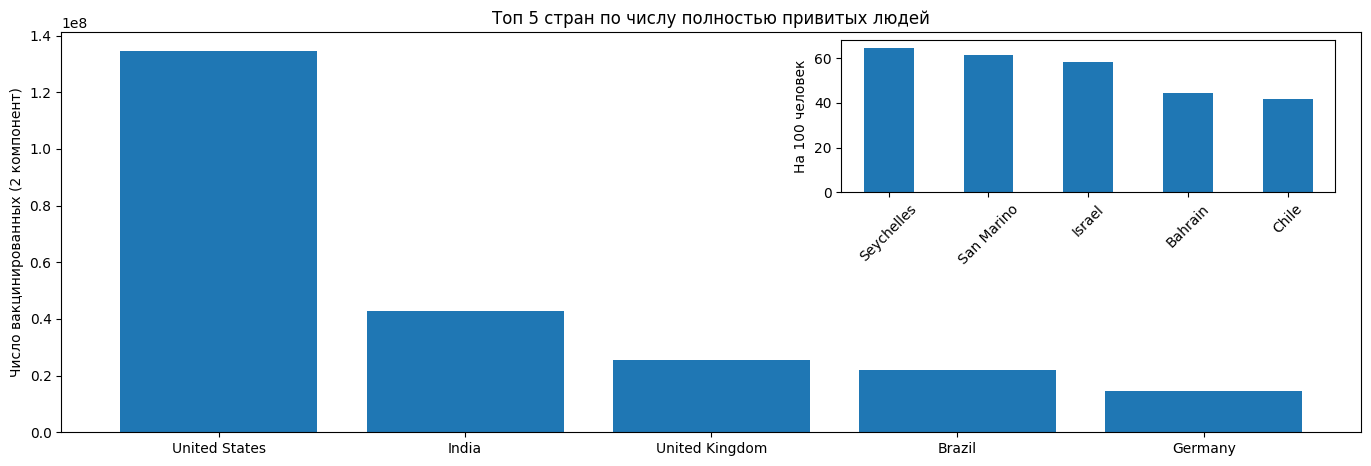

In [43]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Примечание. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

Теперь, обладая знаниями о методе subplots(), построим три графика:

Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
Линейный график изменения ежедневной заболеваемости в стране.
Гистограмму ежедневной заболеваемости в стране.
За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

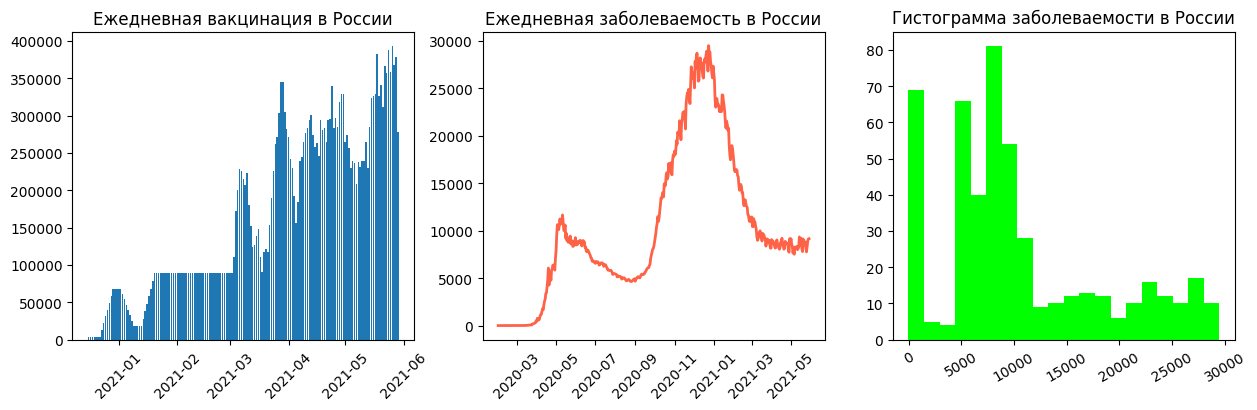

In [44]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

In [45]:
import seaborn as sns
print(sns.__version__)

0.12.2


В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.

Для фильтрации по списку значений используем метод isin(), который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

⭐ А теперь снова немного магии Feature Engineering, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (daily_confirmed_per_hundred).

In [46]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recovered_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

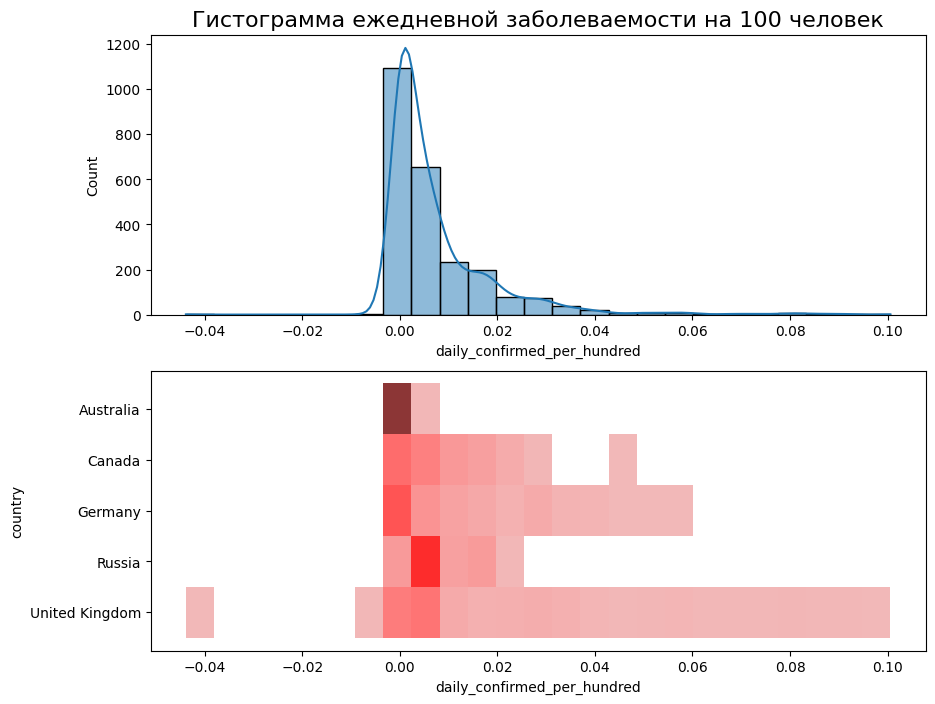

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.

Рассмотрим пример — построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее в задании 3.3.

Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

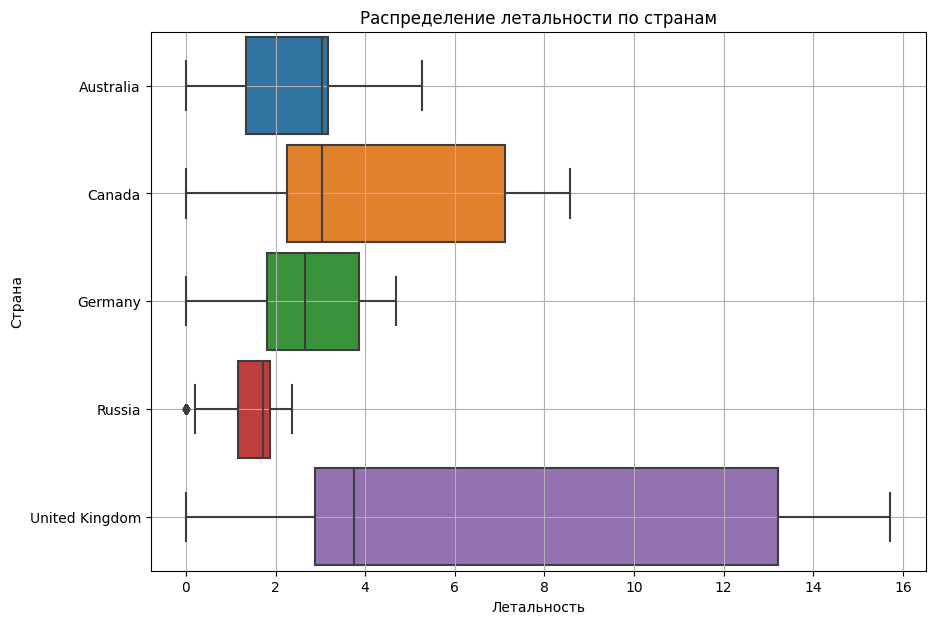

In [48]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

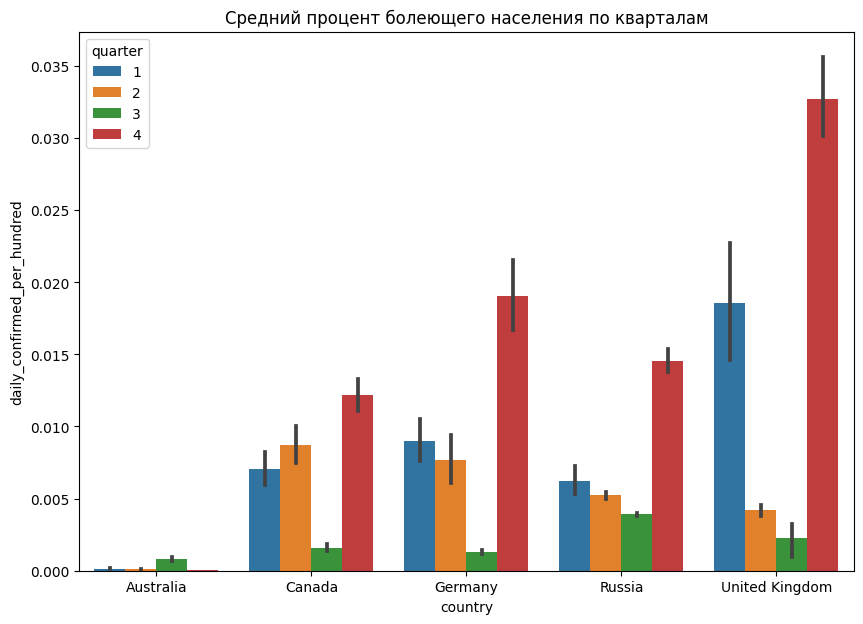

In [49]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

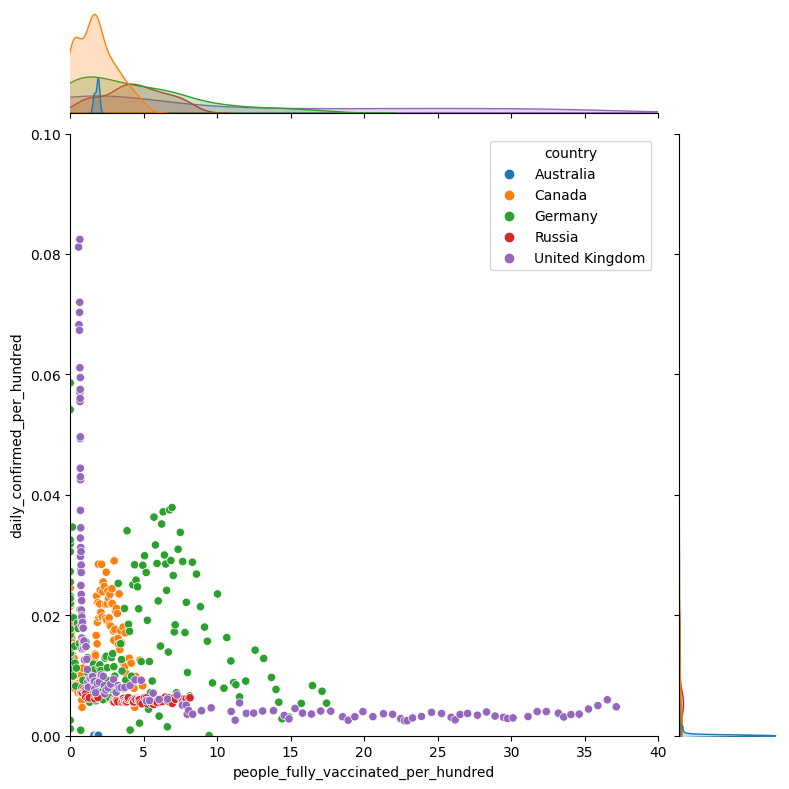

In [50]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [51]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

heatmap = sns.heatmap(data=pivot,

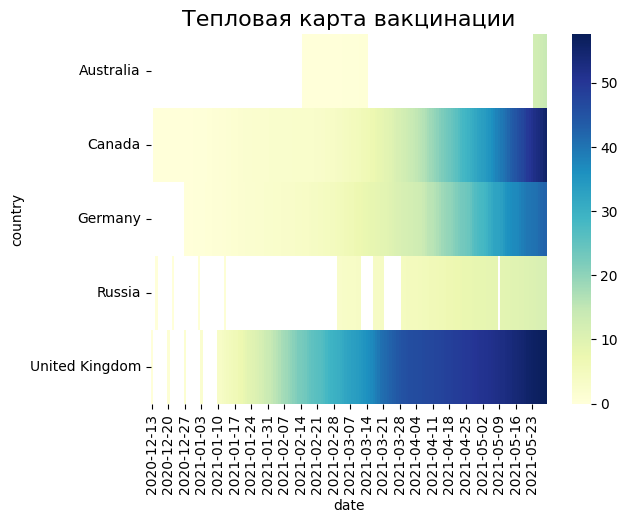

In [52]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения вначале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах (\(confirmed/population * 100\)).
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Выберите верные выводы по построенному графику:
A Из представленных стран самые быстрые темпы роста относительной заболеваемости — в Великобритании.
B Суммарное число заболевших в Австралии превышает 2 % от общего числа населения.
C Интенсивность относительной заболеваемости в России выше, чем в Германии.
D Из представленных стран самая низкая скорость распространения вируса — в Австралии.

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

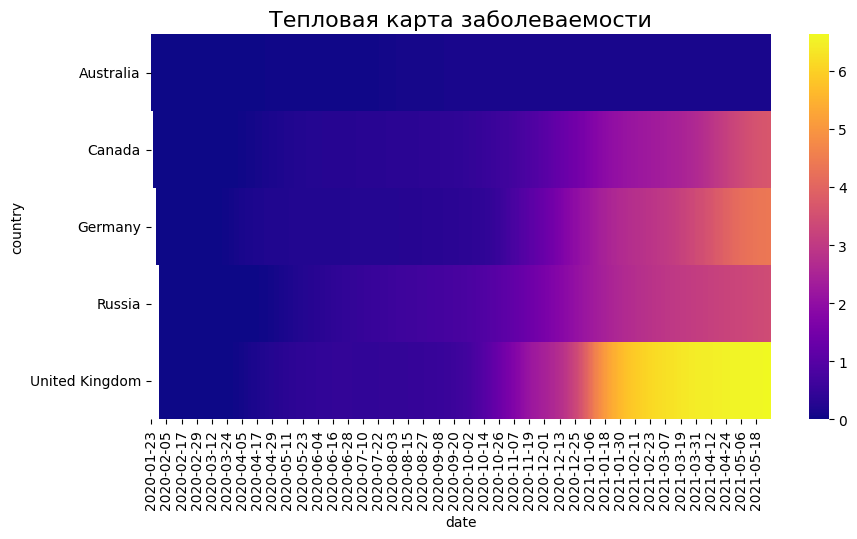

In [53]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values = 'confirmed_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10,5))
heatmap = sns.heatmap(data = pivot, cmap ='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)


Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
Выберите верные выводы по данному графику:
A График для Великобритании имеет «сплюснутый» в нуле вид, что указывает либо на практически полное отсутствие случаев выздоровления, либо, с точки зрения здравого смысла, на неверные данные о числе выздоровевших пациентов в этой стране.
B Наибольший разброс по проценту ежедневных выздоровлений — в Канаде.
C Наименьшая медиана — у Германии.
D В четырёх из пяти стран на графике медианный процент ежедневных выздоровлений превышает 80 %.

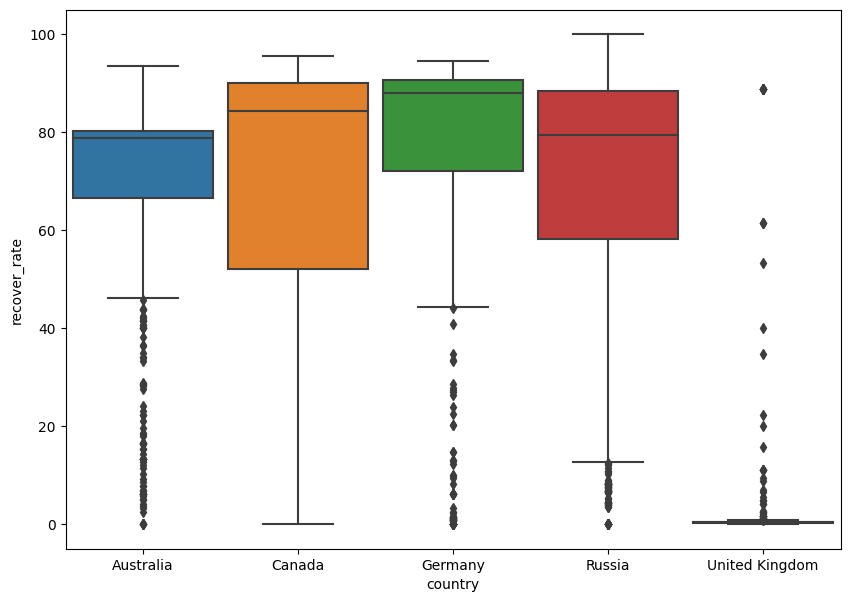

In [54]:
croped_covid_df['recover_rate'] = croped_covid_df['recovered'] / croped_covid_df['confirmed'] * 100
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)

Графические возможности библиотеки Plotly
Экспресс-режим

In [70]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.13.0


Построим график роста зафиксированного числа случаев заражения (confirmed), смертей (deaths), выздоровлений (recovered) и активных случаев (active) за всё время. Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().

Для отображения созданной методом line() фигуры используется метод fig.show():

In [1]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

NameError: name 'covid_df' is not defined